### Analysis of bikes mobility data 

 *Authors: Liubov.*  Code is inspired by researchers from CityLab Berlin.
 
This is inspired by the workshop https://github.com/technologiestiftung/bike-sharing
    and data shared by Citylab Berlin scientists.
Thanks to Alexandra Kapp and Fabien for inspiration and data, code and ideas sharing.     
    
One can do analysis similar to one which I did with other trajectories for mobility https://github.com/Liyubov/mobility_analysis   
Work in progress. If you find errors, please let me know.

In [14]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import csv


# load data, it is very heavy 

df = pd.read_csv('C:/Users/lyubo/Documents/DATA_networks/mobilitydata/bikes_sharing_data_technologiestiftung_berlin/pseudonomysed_raw.csv')
df.head()

df_cleaned = pd.read_csv('C:/Users/lyubo/Documents/DATA_networks/mobilitydata/bikes_sharing_data_technologiestiftung_berlin/pseudonomysed.csv')


df.columns = ["id", "id.1", "id.1.1", "latitude", "longitude", "next_lat", "next_lon", "distance", "duration", "speed", "starttime", "endtime"]
df_cleaned.columns = ["id", "id.1", "latitude", "longitude", "next_lat", "next_lon", "distance", "duration", "speed", "starttime", "endtime"]


### Data analysis 

It would be interesting also to see the network of roads of Berlin (to find). We start with simple things:
1. distribution of routes 
2. distribution of lengths of routes 
3. fits of distribution of routes

### Research questions 

1. Does bike mobility data (bike sharing) have particular properties? 
2. How different types of transport are influencing each other, e.g scooter data inlfuence bikes (temporal evolution of data - average in time)?
3. How network and distribution of bikes can influnece bike sharing capability?


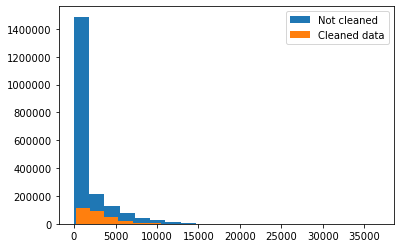

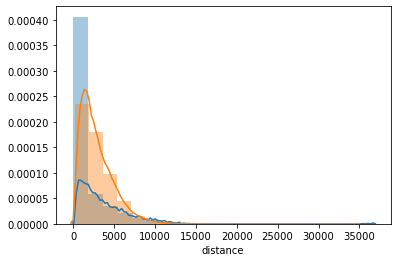

In [9]:
# Now we count the length of routes. 
# This can tell us if airlines fly more shorter routes, or more longer ones. 

import math
import matplotlib.pyplot as plt

import seaborn


# now we apply this function to routes dataframe
#route_lengths = routes.apply(calc_dist, axis=1)

# now we are plotting the histogram 
plt.hist(df.distance, bins=20)
plt.hist(df_cleaned.distance, bins=20)
plt.legend(['Not cleaned', 'Cleaned data']) #plt.legend(["Time window size"])
plt.show()

seaborn.distplot(df.distance, bins=20)
seaborn.distplot(df_cleaned.distance, bins=20)
plt.show()

### Plotting on a map 

We use standard modules basemap for that. One can also use this module https://basemaptutorial.readthedocs.io/en/latest/plotting_data.html 

C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



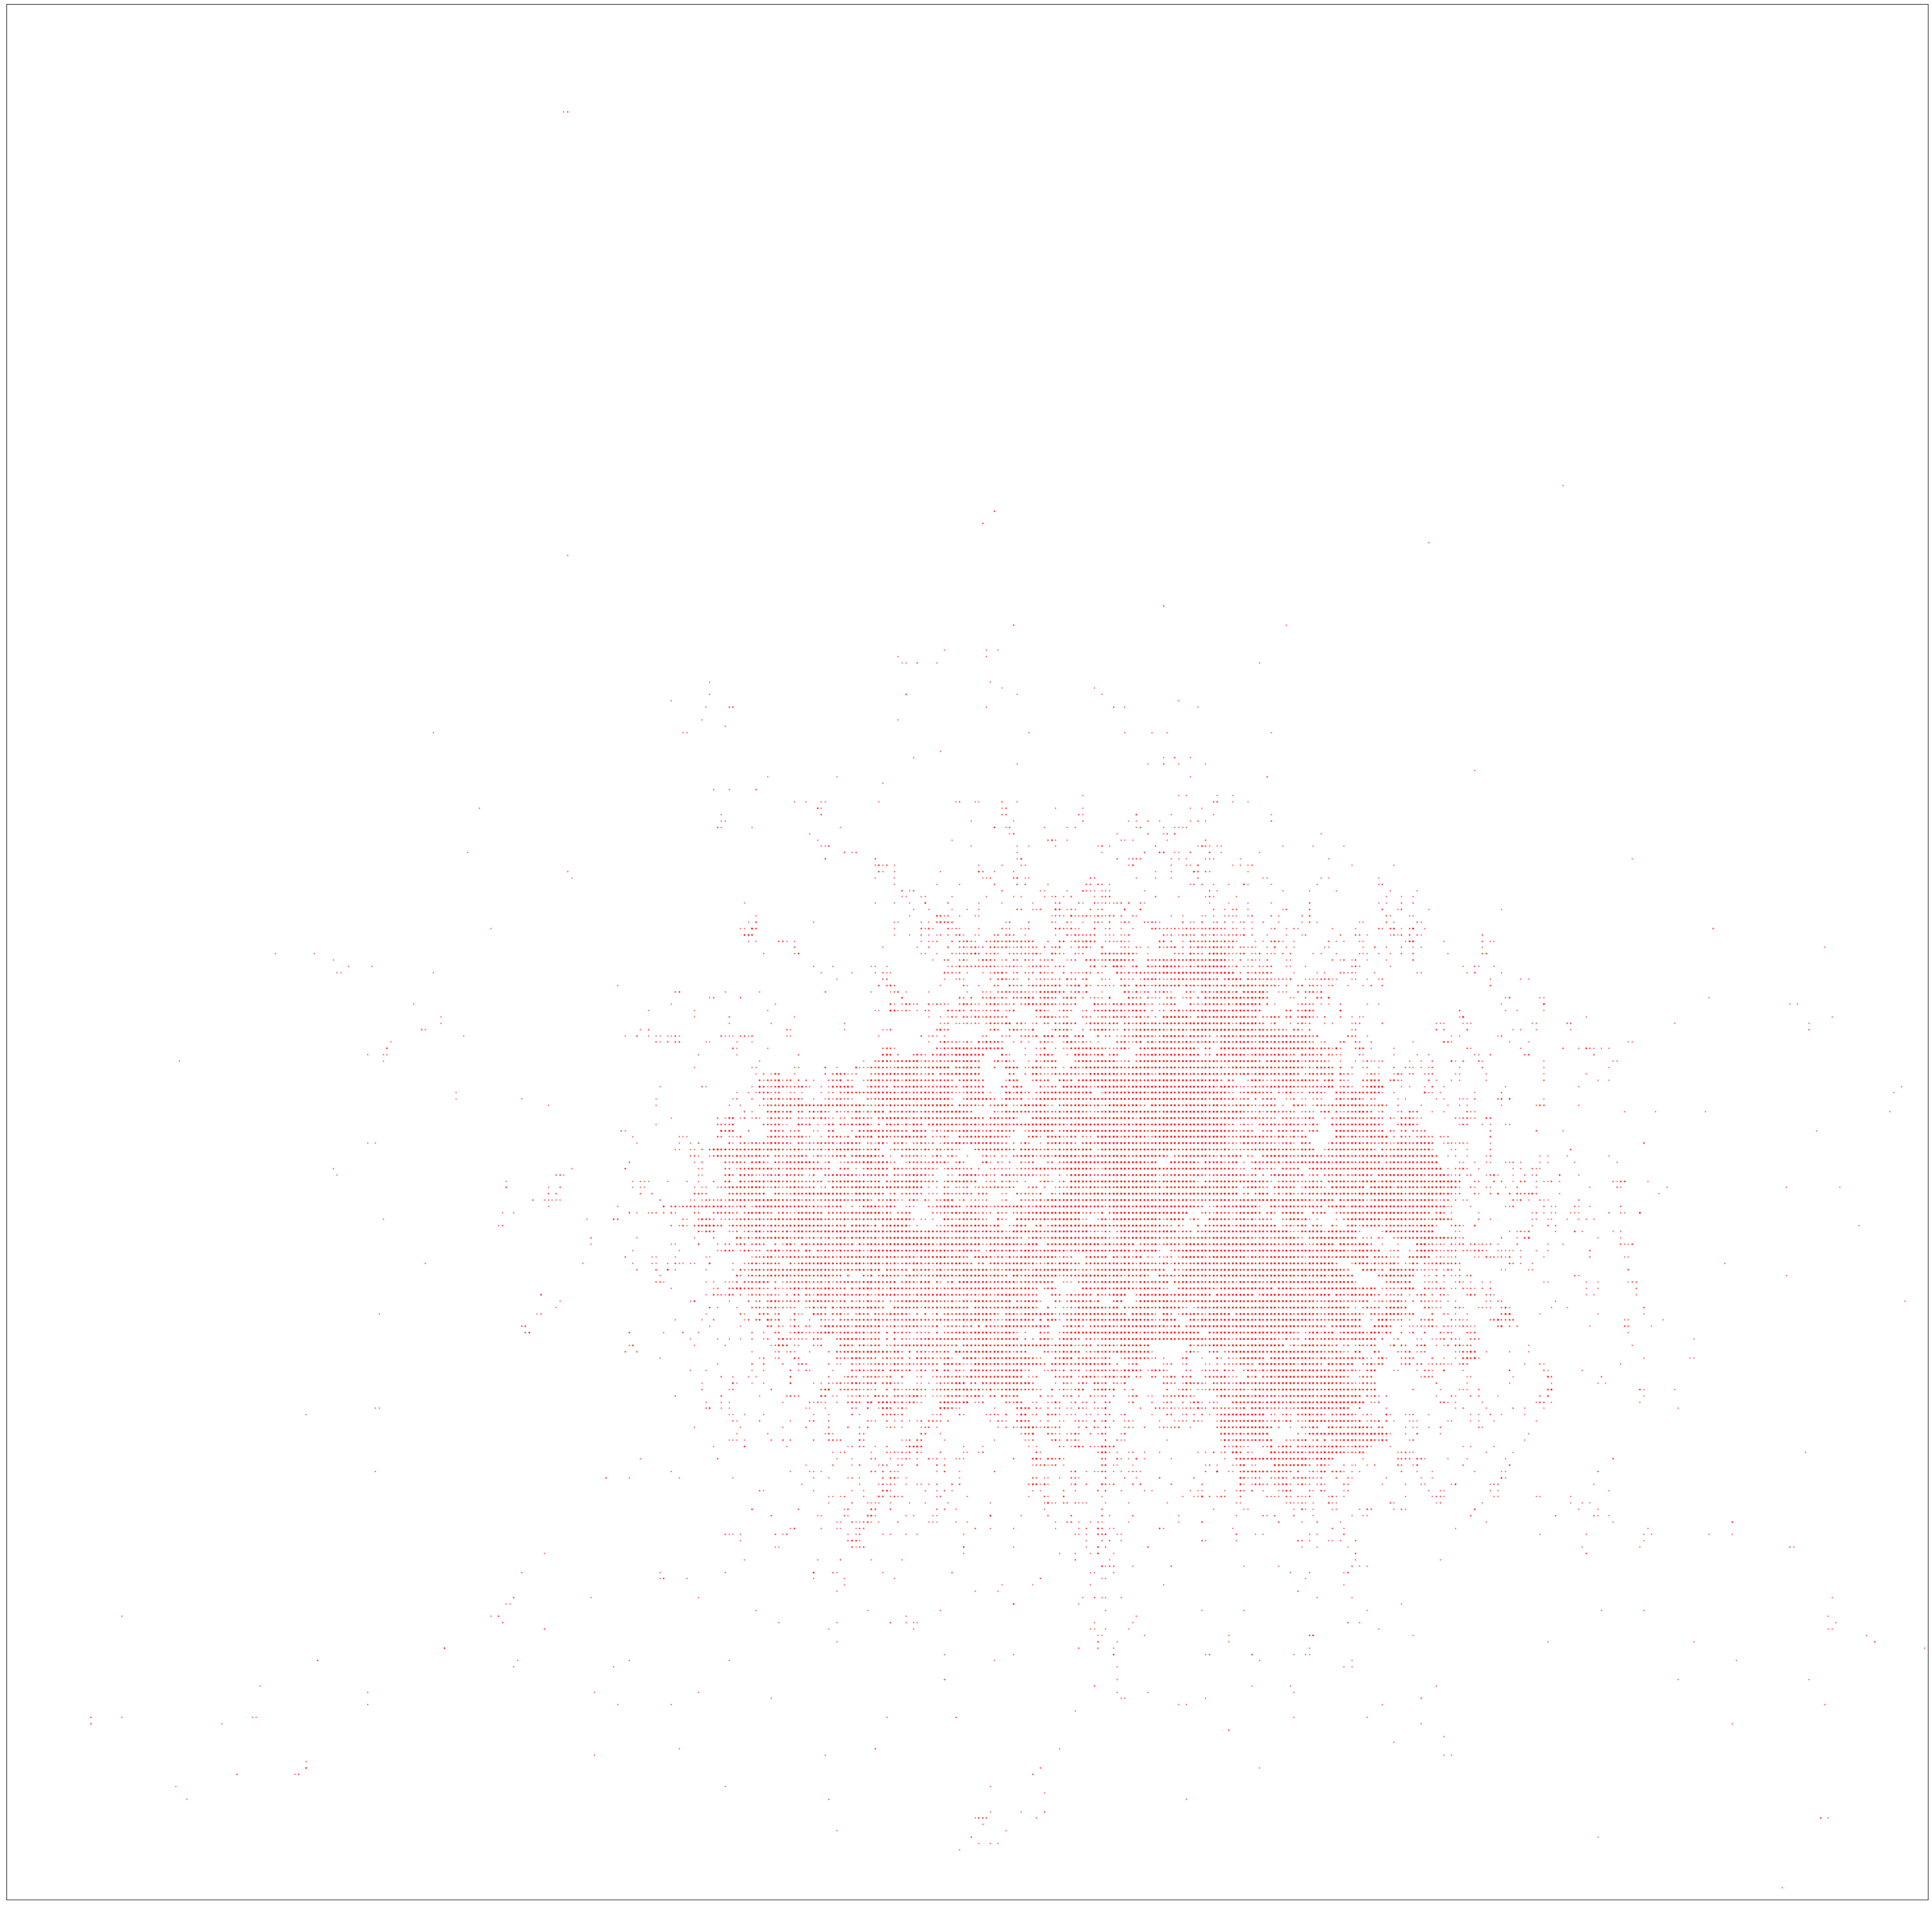

In [4]:
# Now let us plot data on a maps
# First we define x as ids of places
# Import the basemap package using latitude and longitude pairs for airports. The first map we can make is one that shows all the airports all over the world. We can do this with the basemap extension to matplotlib. This enables drawing world maps and adding points, and is very customizable.

import math
import matplotlib.pyplot as plt

import seaborn
from mpl_toolkits.basemap import Basemap

# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.



# Create a map on which to draw. 
# Use mercator projection, and showing the whole world.

fig, ax = plt.subplots(figsize=(60, 60))

# Berlin Latitude: 52.520008, longitude: 13.404954.
# We want to plot only Berlin surrounding areas
m = Basemap(projection='merc',llcrnrlat=52.4,urcrnrlat=52.7,llcrnrlon=13.1,urcrnrlon=13.6,lat_ts=20,resolution='c')
# Draw coastlines, and the edges of the map. NASA bluemarble
m.shadedrelief() #m.bluemarble()


m.drawcoastlines()
m.drawmapboundary()

# Convert latitude and longitude to x and y coordinates
x, y = m(list(df_cleaned["longitude"].astype(float)), list(df_cleaned["latitude"].astype(float)))

#print(type(x))

# Use matplotlib to draw the points onto the map.
m.scatter(x,y,1,marker='o',color='red')
# Show the plot.
plt.show()



## Correlation of bikes activities with weather and other metadata

Examples of metadata: 
1. By metadata we mean distribution of places, e.g. libraries nearby, or kindergarten (ideas from hackatons).

2. We can also analyse the influence of trajectories by weather inspired by some similar analysis made for twitter from www.openhumans.org notebooks (Bastian et al.).



In [10]:
# get number of bikes taken at certain amount of time





### Weather data API

We can now go ahead and import the weather data from the Dark Sky's API and convert the data into a data frame:
weather_variables  = ['precipType','precipIntensity','temperatureHigh',
                      'temperatureLow','precipIntensityMax','precipAccumulation',
                      'apparentTemperatureHigh', 'apparentTemperatureLow']
             
             
Another possibility is directly load it from the API of openweathermap: 
https://openweathermap.org/history


By geographic coordinates
Description:
Call historical data by geographic coordinates.
API call:

http://history.openweathermap.org/data/2.5/history/city?lat={lat}&lon={lon}&type=hour&start={start}&end={end}

http://history.openweathermap.org/data/2.5/history/city?lat={lat}&lon={lon}&type=hour&start={start}&cnt={cnt}

Parameters:

lat, lon coordinates of the location of your interest

type type of the call, keep this parameter in the API call as 'hour'

start start date (unix time, UTC time zone), e.g. start=1369728000

end end date (unix time, UTC time zone), e.g. end=1369789200

cnt amount of returned data (one per hour, can be used instead of 'end')
Examples of API calls:
http://history.openweathermap.org/data/2.5/history/city?lat=41.85&lon=-87.65 

### Analysis of weather and bikes data 

Simplest analysis is now to correlate (linearly or using event synchronisation methods) data from weather_for_location_day(location, date) and data from bikes sharing files.



We investigate how location of starting position is influenced by the weather. For this we estimate weather in a starting location and then color point according to scale [1,2,3,4,5], where 1 corresponds to "bad" weather (cold, rainy), 5 corresponds to "good" weather (shiny, normal temperature). 
Work in Progress.

  

In [15]:
#loop through all entrances of df_cleaned 
# we calculate weather in locations lat/long at starttime (we can also do it later for endtime)
import numpy as np

#we will use darksky key 
#DARKSKY_KEY = "e885d3f5c078117536660bd78c9a2c69"


def call_weather(location,date):
    '''we call openweathermap API to retrieve weather data file from website'''
        
    # Make a get request to get the latest position of the international space station from the opennotify api.
    weather_json = requests.get("http://history.openweathermap.org/data/2.5/history/city?lat=41.85&lon=-87.65")#("http://history.openweathermap.org/data/2.5/history/city?id=2885679&type=hour")#("http://api.open-notify.org/iss-now.json") #("http://api.open-notify.org/iss-now.json")#
    # Print the status code of the response if everything is ok code = 200
    print(response.status_code)

    return weather_json
    
for index, row in df_cleaned.iterrows(): 
    #print (row["latitude"], row["latitude"]) 
    #print(row["starttime"]) 
    
    testloc = np.array([22,33])
    testdate = "2016-06-01"
    call_weather(location,date)
    #weather_for_location_day(testloc, testdate)

    
    